### Two test descriptive statistics and correlation
___

Using exercises spreadsheets from Designing and Analyzing Language Tests by Oxford.

The purpose of this notebook is to calculate the various descriptive statistics, to compute the Peardon $r$ for two tests, and then to calculate the Spearman $p$ for the same pair of tests.

*NOTE: both sets of test scores are continuous variables, interval-level data, and rather normally distributed, so it is appropriate to use $r$.*

<br>

#### General Setup
___

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

In [2]:
# styling for plots
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (5,4)

<br>

#### Load the data
___

In [3]:
# loading the data
two_tests = pd.read_excel('Data/two_test_descr_stats_and_corr.xlsx')
two_tests.head()

,Student,Test X,Test Y
0,Student01,9,12
1,Student02,12,12
2,Student03,5,7
3,Student04,6,6
4,Student05,12,14


In [4]:
two_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Student  30 non-null     object
 1   Test X   30 non-null     int64 
 2   Test Y   30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


<br>

#### Descriptive stats
___

In [5]:
# calculate pandas stats and converting it to a dataframe
stats = pd.DataFrame([two_tests['Test X'].describe(), two_tests['Test Y'].describe()]).T
stats

,Test X,Test Y
count,30.000000,30.000000
mean,10.566667,10.500000
std,3.793673,3.471559
min,5.000000,3.000000
25%,7.250000,8.000000
50%,10.500000,11.000000
75%,13.000000,13.750000
max,17.000000,16.000000


In [6]:
# renaming the std to std(sample) and add std for population
stats.loc['std(sample)'] = stats.loc['std']
stats.loc['std(pop)'] = [two_tests['Test X'].std(ddof=0), two_tests['Test Y'].std(ddof=0)]

# renaming the min and max 
stats.loc['high score'] = stats.loc['max']
stats.loc['low score'] = stats.loc['min']
stats.loc['n'] = stats.loc['count']

# adding other stats
stats.loc['mode'] = [two_tests['Test X'].mode().tolist(), two_tests['Test Y'].mode().tolist()]
stats.loc['var(sample)'] = [two_tests['Test X'].var(), two_tests['Test Y'].var()/100]
stats.loc['var(pop)'] = [two_tests['Test X'].var(ddof=0), two_tests['Test Y'].var(ddof=0)/100]
stats.loc['range'] = stats.loc['high score'] - stats.loc['low score'] + 1
stats.loc['Q'] = (stats.loc['75%'] - stats.loc['25%']) / 2

stats.loc['skewness'] =  [two_tests['Test X'].skew(), two_tests['Test Y'].skew()]
n = stats.loc['n'][0]
stats.loc['SES'] = np.sqrt((6*n * (n-1)) / ((n-2) * (n+1) * (n+3)))
stats.loc['skew/SES'] = stats.loc['skewness'] / stats.loc['SES']
stats.loc['kurtosis'] = [two_tests['Test X'].kurt(), two_tests['Test Y'].kurt()]
stats.loc['SEK'] = np.sqrt((4*(n**2-1)*stats.loc['SES'][0]**2) / ((n-3)*(n+5)))
stats.loc['kurt/SEK'] = stats.loc['kurtosis'] / stats.loc['SEK']

# removing not needed lines
stats.drop(['std', 'min', 'max', 'count'], axis=0, inplace=True)

C:\Users\olga\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [7]:
# round all stats to two decimal points and changing the order
stats = np.round(stats, 3)
stats = stats.reindex(index = ['mean','mode','25%', '50%', '75%', 'high score', 'low score', 
                       'range', 'std(pop)', 'std(sample)', 'var(pop)', 'var(sample)', 'Q', 'n',
                      'skewness', 'SES', 'skew/SES','kurtosis', 'SEK', 'kurt/SEK'])
stats.index.name = 'Statistics'
stats

,Test X,Test Y
Statistics,,
mean,10.566667,10.5
mode,"[9, 13]",[14]
25%,7.25,8.0
50%,10.5,11.0
75%,13.0,13.75
high score,17.0,16.0
low score,5.0,3.0
range,13.0,14.0
std(pop),3.729909,3.41321


<br>

#### Correlation
___

In [8]:
# Pearson correlation
pearson = two_tests.corr(method='pearson')
pearson.index.name = 'Pearson'
pearson

,Test X,Test Y
Pearson,,
Test X,1.000000,0.757995
Test Y,0.757995,1.000000


In [9]:
# Spearman correlation
spearman = two_tests.corr(method='spearman')
spearman.index.name = 'Spearman'
spearman

,Test X,Test Y
Spearman,,
Test X,1.000000,0.775093
Test Y,0.775093,1.000000


In [10]:
# calculate r squared
r2 = pd.DataFrame({'r^2': [pearson.values[0][1] ** 2]})
r2

,r^2
0,0.574556


<br>

#### Plotting
___

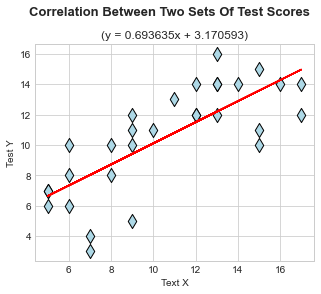

In [11]:
# calculate the trendline
z = np.polyfit(two_tests['Test X'], two_tests['Test Y'], 1)
p = np.poly1d(z)

# plot the correlation between two sets of scores
fig, ax = plt.subplots()
fig.suptitle("Correlation Between Two Sets Of Test Scores", fontweight='bold', fontsize=13,y=1.01)
ax.scatter(x=two_tests['Test X'], y=two_tests['Test Y'], c='lightblue', s=100, marker='d', edgecolor='k')
ax.plot(two_tests['Test X'], p(two_tests['Test X']), c='r')

# styling of plot
ax.set(title=f'(y = {z[0]:.6f}x + {z[1]:.6f})',
      xlabel='Text X',
      ylabel='Test Y')

plt.savefig('Data/Correlation Between Two Sets Of Test Scores.png', bbox_inches='tight');

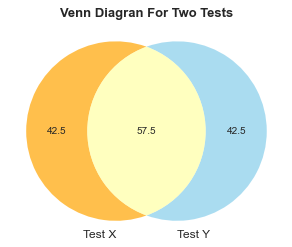

In [12]:
# define overlap and uniqueness
overlap = np.around(r2.values[0][0]*100, 1)
unique = np.around(100 - overlap, 1)

# plot venn diagram
venn2(subsets = (unique, unique, overlap), set_labels = ('Test X', 'Test Y'), set_colors=('orange', 'skyblue'), alpha = 0.7)
plt.title('Venn Diagran For Two Tests', fontweight='bold', fontsize=13)
plt.savefig('Data/Venn Diagran For Two Tests.png', bbox_inches='tight');

<br>

#### Saving the results
___

In [13]:
# write and save 5 dataframes to the excel file 
writer = pd.ExcelWriter('Data/two_test_correlation_analysis.xlsx', engine='xlsxwriter')
two_tests.to_excel(writer, index = False)
stats.to_excel(writer, startcol=len(two_tests.columns)+2, index=True)
pearson.to_excel(writer, startcol=len(two_tests.columns)+2, startrow=len(stats)+3, index=True)
spearman.to_excel(writer, startrow=len(pearson)+len(stats)+5, startcol=len(two_tests.columns)+2, index=True)
r2.to_excel(writer, startrow=len(pearson)+len(stats)+9, startcol=len(two_tests.columns)+2, index=False)

# insert the image into the worksheet
workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.insert_image('J1', 'Data/Correlation Between Two Sets Of Test Scores.png')
worksheet.insert_image('J22', 'Data/Venn Diagran For Two Tests.png')

# styling
column_settings = [{'header': column} for column in two_tests.columns]
(max_row, max_col) = two_tests.shape
worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})

writer.save()

<br>

___
#### End.